In [48]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import dates
import seaborn as sb
import numpy as np
from pandas import DataFrame

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
# ACF, PACF 테스트
from statsmodels.tsa.stattools import acf, pacf
# ACF, PACF 시각화 기능
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [49]:
my_dpi = 200
font_path = "../data_visualization/NotoSansKR-Regular.ttf"
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = "Noto Sans KR"
my_theme = "dark"

sb.set_theme(style=my_theme)
plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [50]:
origin = load_data('air_passengers')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기 : {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

print("\n===== 데이터 타입 확인 =====")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/lab13_/air_passengers.xlsx
[desc] 어느 항공사의 월간 탑승객 수 (출처: https://www.kaggle.com/datasets/rakannimer/air-passengers)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (144, 2)
열 개수: 2
행 개수: 144

===== 데이터 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [51]:
df = origin.set_index('Month')
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [52]:
p = 2
d = 2
q = 2

results = []

for x in range(0, p+1):
    for y in range(0, d+1):
        for z in range(0, q+1):
            try:
                #model = ARIMA(df['Passengers'], order=(x, y, z))
                #6개월 단위 계절성 추가
                model = ARIMA(df['Passengers'], order=(x,y,z), seasonal_order=(x,y,z,6))
                fit = model.fit()

                results.append({
                    'p': x,
                    'd': y,
                    'q': z,
                    'AIC' : fit.aic,
                    'BIC' : fit.bic
                })
            except Exception as e:
                # 수렴 실패, 모형 오류는 건너뜀
                continue
df_results = DataFrame(results)

# 방법1 - 합산 점수 고려
# df_results['AIC_rank'] = df_results['AIC'].rank()
# df_results['BIC_rank'] = df_results['BIC'].rank()

# # 점수가 낮을 수록 좋음
#df_results['rank_sum'] = df_results['AIC_rank'] + df_results['BIC_rank']

#best_model = df_results.sort_values('rank_sum').iloc[0]
#best_model

best_model = df_results.sort_values(['BIC','AIC']).iloc[0]
best_model

c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python

p         1.000000
d         2.000000
q         1.000000
AIC    1072.901835
BIC    1087.239507
Name: 16, dtype: float64

도출된 값으로 최종모형 만들기

In [53]:
best_order = (
    int(best_model['p']),
    int(best_model['d']),
    int(best_model['q'])
)

s_best_order = (
    int(best_model['p']),
    int(best_model['d']),
    int(best_model['q']),
    6
)

final_model = ARIMA(df['Passengers'], order=best_order, seasonal_order=s_best_order)
final_fit = final_model.fit()
print(final_fit.summary())

c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                    
Dep. Variable:                      Passengers   No. Observations:                  144
Model:             ARIMA(1, 2, 1)x(1, 2, 1, 6)   Log Likelihood                -531.451
Date:                            월, 22 12 2025   AIC                           1072.902
Time:                                 15:05:31   BIC                           1087.240
Sample:                             01-01-1949   HQIC                          1078.728
                                  - 12-01-1960                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2969      0.080     -3.709      0.000      -0.454      -0.140
ma.L1         -0.9996      5.635     -0.177      0.859     

c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


분석 결과 활용

In [54]:
df2 = df.copy()
df2['pred'] = final_fit.fittedvalues
df2.head()

,Passengers,pred
Month,,
1949-01-01,112,0.000000
1949-02-01,118,195.476770
1949-03-01,132,125.032558
1949-04-01,129,145.660237
1949-05-01,121,126.107570


이후 1년간의 추가적인 예측값을 생성
- 월단위 데이터이므로 12개의 추가 데이터 생성

In [55]:
fc = final_fit.forecast(12)
fc

1961-01-01    449.720615
1961-02-01    420.457874
1961-03-01    442.371942
1961-04-01    482.683414
1961-05-01    489.791204
1961-06-01    555.053657
1961-07-01    644.221292
1961-08-01    624.863574
1961-09-01    524.500469
1961-10-01    478.565048
1961-11-01    406.128461
1961-12-01    451.019092
Freq: MS, Name: predicted_mean, dtype: float64

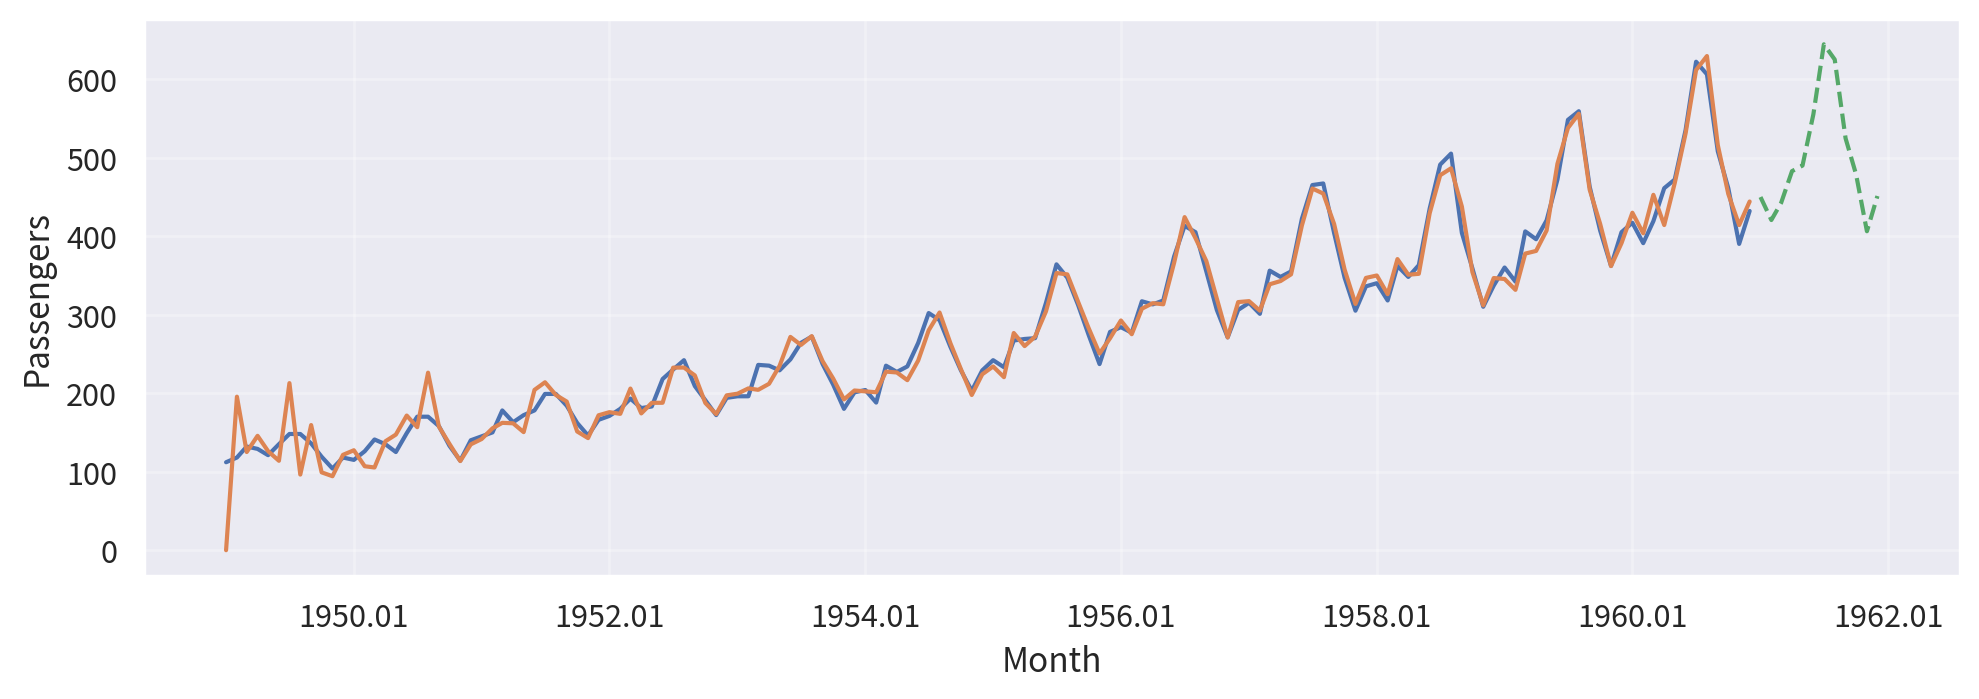

In [56]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 2000             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

#관측치
sb.lineplot(data=df2, x=df2.index, y='Passengers')
#예측치
sb.lineplot(data=df2, x=df2.index, y='pred')
#이후 예상
sb.lineplot(x=fc.index, y=fc.values, linestyle='--')

ax.grid(True, alpha=0.3)

monthyearFmt = dates.DateFormatter("%Y.%m")
ax.xaxis.set_major_formatter(monthyearFmt)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

분석 결과 해석
- 시계열 분석 결과 보고에서는 모형 구조 -> 적합도 -> 계수 해석 -> 잔차 진단의 흐름이 가장 표준적

결과 보고 함수

In [57]:
def arima_report(fit, data, threshold = 0.05):
    """
    SARIMAXResults 객체(fit)와 원본 데이터(data)를 받아
    모형 적합도 표(cdf),
    계수 요약 표(rdf),
    모형 요약 문장(result_report),
    모형 판정 문장(model_report),
    계수별 해석 문장(variable_reports)를 반환한다.
    """

    #--------------------
    # 1. 모형 적합도 요약
    #--------------------
    cdf = DataFrame({
        'Log Likelihood' : [fit.llf],
        'AIC' : [fit.aic],
        'BIC' : [fit.bic],
        'HQIC' : [fit.hqic],
        '관측치 수':[fit.nobs]
    })

    #--------------------
    # 2. 계수 테이블 구성
    #--------------------
    params = fit.params
    bse = fit.bse
    zvals = params/bse
    pvals = fit.pvalues
    conf = fit.conf_int()

    rows = []
    for name in params.index:
        p = pvals[name]
        stars = (
            "***" if p < 0.001 else
            "**" if p < 0.01 else
            "*" if p < 0.05 else
            ""
        )

        rows.append({
            "변수" : name,
            "계수" : params[name],
            "표준오차" : bse[name],
            "z" : f"{zvals[name]:.3f}{stars}",
            "p-value": p,
            "CI_lower": conf.loc[name,0],
            "CI_upper": conf.loc[name,1]
        })
    rdf = DataFrame(rows)

    #--------------------
    # 3. 모형 요약 문장
    #--------------------

    result_report = (
        f"Log Likelihood = {fit.llf:.3f}, "
        f"AIC = {fit.aic:.3f}, "
        f"BIC = {fit.bic:.3f}."
    )

    #--------------------
    # 4. 모형 판정 문장
    #--------------------
    lb = fit.test_serial_correlation(method='ljungbox')
    lb_pvalue = lb[0][1][-1]

    model_report = (
        f"ARIMA{fit.model.order}x{fit.model.seasonal_order}모형을 적합한 결과, "
        f"AIC {fit.aic:.3f}, BIC {fit.bic:.3f}로 나타났으며 "
    )

    if lb_pvalue >= threshold:
        model_report +=(
            "잔차들 사이에 특별한 시간적 패턴은 관찰되지 않음을 통계적으로 확인하였다."
            "(잔차의 자기 상관은 Ljung-Box 검정에서 유의하지 않았다.)"
        )
    else:
        model_report += (
            "잔차들 사이에 시간적 패턴이 남아있는 것으로 나타났으며, "
            "모형이 충분히 설명하지 못했을 가능성이 있다."
            "(잔차의 자기 상관이 Ljung-Box 검정에서 통계적으로 유의하다.)"
        )

    #--------------------
    # 5. 계수별 해석 문장
    #-------------------
    variable_reports = []

    for _, row in rdf.iterrows():
        variable_reports.append(
            f"{row['변수']} 계수는 {row['계수']:.3f}로 "
            f"통계적으로{'유의하다' if row['p-value'] < threshold else '유의하지 않다'} "
            f"(p {'<' if row['p-value'] < threshold else '>'} {threshold})."
        )

    return cdf, rdf, result_report, model_report, variable_reports

cdf, rdf, r, m, v = arima_report(final_fit, df2)
display(cdf)
display(rdf)
display(r)
display(m)
display(v)


,Log Likelihood,AIC,BIC,HQIC,관측치 수
0,-531.450917,1072.901835,1087.239507,1078.72771,144


,변수,계수,표준오차,z,p-value,CI_lower,CI_upper
0,ar.L1,-0.296878,0.080038,-3.709***,0.000208,-0.453749,-0.140007
1,ma.L1,-0.999587,5.635402,-0.177,0.859213,-12.044772,10.045598
2,ar.S.L6,-0.984122,0.011507,-85.526***,0.000000,-1.006675,-0.961569
3,ma.S.L6,-0.996244,1.991822,-0.500,0.616957,-4.900144,2.907656
4,sigma2,134.605180,795.200757,0.169,0.865583,-1423.959664,1693.170023


'Log Likelihood = -531.451, AIC = 1072.902, BIC = 1087.240.'

'ARIMA(1, 2, 1)x(1, 2, 1, 6)모형을 적합한 결과, AIC 1072.902, BIC 1087.240로 나타났으며 잔차들 사이에 특별한 시간적 패턴은 관찰되지 않음을 통계적으로 확인하였다.(잔차의 자기 상관은 Ljung-Box 검정에서 유의하지 않았다.)'

['ar.L1 계수는 -0.297로 통계적으로유의하다 (p < 0.05).',
 'ma.L1 계수는 -1.000로 통계적으로유의하지 않다 (p > 0.05).',
 'ar.S.L6 계수는 -0.984로 통계적으로유의하다 (p < 0.05).',
 'ma.S.L6 계수는 -0.996로 통계적으로유의하지 않다 (p > 0.05).',
 'sigma2 계수는 134.605로 통계적으로유의하지 않다 (p > 0.05).']

연습문제 1.
---
- temperatures_seoul 데이터는 1937년 07월 01일부터 2023년 08월 06일까지 서울의 평균 기온을 조사한 자료의 일부이다.
- 이 데이터를 활용하여 조사기간동안 서울의 평균 기온이 어떻게 변화하고 있는지 분석하고 앞으로 1년간의 평균 기온을 시각화 하시오.
- 시각화 기간은 2023년 8월 6일을 기준으로 전후 1년간으로 한다.

In [58]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import dates
import seaborn as sb
import numpy as np
from pandas import DataFrame
import pandas as pd

from statsmodels.tsa.arima.model import ARIMA

In [59]:
# origin = load_data('temperatures_seoul')

# print("\n===== 데이터 크기 확인 =====")
# print(f"데이터셋 크기 : {origin.shape}")
# print(f"열 개수: {origin.shape[1]}")
# print(f"행 개수: {origin.shape[0]}")

# print("\n===== 데이터 타입 확인 =====")
# print(origin.info())

# origin.head()

In [60]:
# df = origin.set_index('날짜')
# df.head()

In [61]:
# #데이터 범위를 먼저 설정하고 그만큼만 카피 5년 ㄱㄱ
# diff_df = df.loc['2018-08-06':'2023-08-06'].copy()
# yname = '평균기온(℃)'
# diff_count = 0  #몇 번까지 차분을 수행했는지 count
# result = []     #결과를 저장할 빈 리스트

# while True:
#     ar = adfuller(diff_df[yname])
#     ar_dict={
#         '차수': diff_count,
#         'ADF Statistic': ar[0],
#         'p-value': ar[1],
#         'result' : True if ar[1] <= 0.05 else False
#     }

#     # 리스트에 정상성 검사 결과를 저장
#     result.append(ar_dict)

#     # 정상성 충족이라면 반복 중단
#     if ar_dict['result']:
#         break

#     # 정상성이 충족되지 않았다면 차분 수행
#     diff_count += 1
#     diff_df= diff_df.diff().dropna()

# # 차분 결과표
# display(DataFrame(result))

# # 차분의 결과로 생성된 데이터프레임
# display(diff_df.head())

# # 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
# width_px = 1800             #그래프 가로 크기
# height_px = 600             #그래프 세로 크기
# rows = 1                    #도화지의 행 수
# cols = 1                    #도화지의 열 수
# figsize = (width_px / my_dpi, height_px / my_dpi)
# fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# # 2) 그래프 그리기 -> seaborn 사용
# # sb.boxplot(data=df1, orient='h')
# sb.lineplot(data=diff_df, x=diff_df.index, y=yname)

# # 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
# ax.grid(True, alpha=0.3)          
# monthyearFmt = dates.DateFormatter("%Y.%m")
# ax.xaxis.set_major_formatter(monthyearFmt)
# #시각화 기간은 2023년 8월 6일 기준으로 전 후 1년
# target_date = pd.Timestamp('2023-08-06')
# start_date = target_date - pd.DateOffset(years=5)
# end_date = target_date + pd.DateOffset(years=1)
# ax.set_xlim(start_date, end_date)



# # 4) 출력
# plt.tight_layout()                      #여백 제거
# # plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
# plt.show()                              #그래프 화면 출력
# plt.close()                             #그래프 작업 종료

    

ACF값

In [62]:
# # 1. 차분된 시계열의 자기상관계수(ACF) 계산 (lag - 0부터 시작)
# acf_vals = acf(diff_df['평균기온(℃)'])

# # 2. ACF 유의성 판단 기준(근사적 95% 신뢰구간)
# threshold = 2/np.sqrt(len(diff_df['평균기온(℃)']))

# # 3. 임계값을 초과하는 (유의한) lag 인덱스 추출
# significant_lags = np.where(np.abs(acf_vals) > threshold)[0]

# # 4. 결과 확인
# acf_vals , threshold, significant_lags

In [63]:
# acf_vals = acf(diff_df['평균기온(℃)'])

# # 2. ACF 유의성 판단 기준(근사적 95% 신뢰구간)
# threshold = 2/np.sqrt(len(diff_df['평균기온(℃)']))

# df_acf = DataFrame({
#     'lag': np.arange(len(acf_vals)),
#     'acf': acf_vals
# })

# # 3) 유의성 판단
# df_acf['abs_acf'] = df_acf['acf'].abs()
# df_acf['significant'] = df_acf['abs_acf'] > threshold

# # 4) 보기 좋게 정리
# df_acf['acf']= df_acf['acf'].round(3)
# df_acf['abs_acf']= df_acf['abs_acf'].round(3)
# df_acf['threshold'] = round(threshold, 3)

# # 5) lag=0 제외(판정용)
# df_acf_result = df_acf.query('lag>0').reset_index(drop=True)

# # 6) 연속 유의 구간 계산
# df_acf_result['prev_sigificant'] = df_acf_result['significant'].shift(1)

# df_acf_result['cut_candidate'] = (
#     (df_acf_result['prev_sigificant'] == True) &
#     (df_acf_result['significant'] == False)
# )

# df_acf_result[['lag','acf','significant']]
# df_acf_result

모든게 False면 어떡하나요,,???

In [64]:
# q_candidate = (
#     df_acf_result.loc[df_acf_result['cut_candidate'], 'lag'].min()-1
# )

# q_candidate

In [65]:
# # 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
# width_px = 1600             #그래프 가로 크기
# height_px = 700             #그래프 세로 크기
# rows = 1                    #도화지의 행 수
# cols = 1                    #도화지의 열 수
# figsize = (width_px / my_dpi, height_px / my_dpi)
# fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# plot_acf(diff_df['평균기온(℃)'], ax=ax)

# ax.axvline(
#     x=q_candidate,
#     linestyle='--',
#     alpha=0.8,
#     linewidth=1.5,
#     color='red'
# )
# ax.text(
#     q_candidate+0.1,
#     ax.get_ylim()[1]*0.9,
#     f'MA(q) candidate: {q_candidate}',
#     fontsize=9,
#     verticalalignment='top'
# )

# # 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
# ax.set_title("ACF Plot", fontsize=12, pad=8)
# ax.set_xlabel("Lag", fontsize=8, labelpad=5)
# ax.set_ylabel("Autocorrelation", fontsize=8, labelpad=5)
# ax.grid(True, alpha=0.3)

# # 4) 출력
# plt.tight_layout()                      #여백 제거
# # plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
# plt.show()                              #그래프 화면 출력
# plt.close()                             #그래프 작업 종료

PACF 값

In [66]:
# pacf_vals = pacf(diff_df['평균기온(℃)'])
# threshold = 2/np.sqrt(len(diff_df['평균기온(℃)']))

# df_pacf = DataFrame({
#     'lag': np.arange(len(pacf_vals)),
#     'pacf': pacf_vals
# })

# df_pacf['abs_pacf'] = df_pacf['pacf'].abs()
# df_pacf['significant'] = df_pacf['abs_pacf'] > threshold

# df_pacf['pacf']= df_pacf['pacf'].round(3)
# df_pacf['abs_pacf']= df_pacf['abs_pacf'].round(3)
# df_pacf['threshold'] = round(threshold, 3)

# df_pacf_result = df_pacf.query('lag>0').reset_index(drop=True)

# df_pacf_result['prev_significant'] = df_pacf_result['significant'].shift(1)

# df_pacf_result['cut_candidate'] = (
#     (df_pacf_result['prev_significant'] == True) &
#     (df_pacf_result['significant'] == False)
# )

# df_pacf_result[['lag','pacf','significant','cut_candidate']]
# df_pacf_result

In [67]:
# p_candidate = (
#     df_pacf_result.loc[df_pacf_result['cut_candidate'], 'lag'].min()-1
# )
# p_candidate

In [68]:
# # 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
# width_px = 1600             #그래프 가로 크기
# height_px = 700             #그래프 세로 크기
# rows = 1                    #도화지의 행 수
# cols = 1                    #도화지의 열 수
# figsize = (width_px / my_dpi, height_px / my_dpi)
# fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# plot_pacf(origin['평균기온(℃)'], ax=ax)

# ax.axvline(
#     x=p_candidate,
#     linestyle='--',
#     alpha=0.8,
#     linewidth=1.5,
#     color='red'
# )
# ax.text(
#     p_candidate+0.1,
#     ax.get_ylim()[1]*0.9,
#     f'AR(p) candidate: {p_candidate}',
#     fontsize=9,
#     verticalalignment='top'
# )

# # 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
# ax.set_title("PACF Plot", fontsize=12, pad=8)
# ax.set_xlabel("Lag", fontsize=8, labelpad=5)
# ax.set_ylabel("Partial Autocorrelation", fontsize=8, labelpad=5)
# ax.grid(True, alpha=0.3)

# # 4) 출력
# plt.tight_layout()                      #여백 제거
# # plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
# plt.show()                              #그래프 화면 출력
# plt.close()                             #그래프 작업 종료

In [69]:
# p = 7
# d = 1
# q = 0

# results = []

# for x in range(0, p+1):
#     for y in range(0, d+1):
#         for z in range(0, q+1):
#             try:
#                 #model = ARIMA(df['Passengers'], order=(x, y, z))
#                 #12개월 단위 계절성 추가
#                 model = ARIMA(df['평균기온(℃)'], order=(x,y,z), seasonal_order=(x,y,z,12))
#                 fit = model.fit()

#                 results.append({
#                     'p': x,
#                     'd': y,
#                     'q': z,
#                     'AIC' : fit.aic,
#                     'BIC' : fit.bic
#                 })
#             except Exception as e:
#                 # 수렴 실패, 모형 오류는 건너뜀
#                 continue
# df_results = DataFrame(results)

# # 방법1 - 합산 점수 고려
# # df_results['AIC_rank'] = df_results['AIC'].rank()
# # df_results['BIC_rank'] = df_results['BIC'].rank()

# # # 점수가 낮을 수록 좋음
# #df_results['rank_sum'] = df_results['AIC_rank'] + df_results['BIC_rank']

# #best_model = df_results.sort_values('rank_sum').iloc[0]
# #best_model

# best_model = df_results.sort_values(['BIC','AIC']).iloc[0]
# best_model

도출된 값으로 최종 모형 만들기 p=3, d=0, q=0

In [70]:
# best_order = (
#     int(best_model['p']),
#     int(best_model['d']),
#     int(best_model['q'])
# )

# s_best_order = (
#     int(best_model['p']),
#     int(best_model['d']),
#     int(best_model['q']),
#     12
# )

# final_model = ARIMA(df['평균기온(℃)'], order=best_order, seasonal_order=s_best_order)
# final_fit = final_model.fit()
# print(final_fit.summary())

분석 결과 활용

In [71]:
# df2 = df.copy()
# df2['pred'] = final_fit.fittedvalues
# df2.head()

In [72]:
# fc = final_fit.forecast(365)
# fc

In [73]:
# # 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
# width_px = 1300             #그래프 가로 크기
# height_px = 720             #그래프 세로 크기
# rows = 1                    #도화지의 행 수
# cols = 1                    #도화지의 열 수
# figsize = (width_px / my_dpi, height_px / my_dpi)
# fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# #관측치
# sb.lineplot(data=df2, x=df2.index, y='평균기온(℃)')
# #예측치
# sb.lineplot(data=df2, x=df2.index, y='pred')
# #이후 예상
# sb.lineplot(x=fc.index, y=fc.values, linestyle='--')

# ax.grid(True, alpha=0.3)

# monthyearFmt = dates.DateFormatter("%Y.%m")
# ax.xaxis.set_major_formatter(monthyearFmt)
# #시각화 기간은 2023년 8월 6일 기준으로 전 후 1년
# target_date = pd.Timestamp('2023-08-06')
# start_date = target_date - pd.DateOffset(years=1)
# end_date = target_date + pd.DateOffset(years=1)

# ax.set_xlim(start_date, end_date)
# # 4) 출력
# plt.tight_layout()                      #여백 제거
# # plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
# plt.show()                              #그래프 화면 출력
# plt.close()                             #그래프 작업 종료

In [74]:
# def arima_report(fit, data, threshold = 0.05):
#     """
#     SARIMAXResults 객체(fit)와 원본 데이터(data)를 받아
#     모형 적합도 표(cdf),
#     계수 요약 표(rdf),
#     모형 요약 문장(result_report),
#     모형 판정 문장(model_report),
#     계수별 해석 문장(variable_reports)를 반환한다.
#     """

#     #--------------------
#     # 1. 모형 적합도 요약
#     #--------------------
#     cdf = DataFrame({
#         'Log Likelihood' : [fit.llf],
#         'AIC' : [fit.aic],
#         'BIC' : [fit.bic],
#         'HQIC' : [fit.hqic],
#         '관측치 수':[fit.nobs]
#     })

#     #--------------------
#     # 2. 계수 테이블 구성
#     #--------------------
#     params = fit.params
#     bse = fit.bse
#     zvals = params/bse
#     pvals = fit.pvalues
#     conf = fit.conf_int()

#     rows = []
#     for name in params.index:
#         p = pvals[name]
#         stars = (
#             "***" if p < 0.001 else
#             "**" if p < 0.01 else
#             "*" if p < 0.05 else
#             ""
#         )

#         rows.append({
#             "변수" : name,
#             "계수" : params[name],
#             "표준오차" : bse[name],
#             "z" : f"{zvals[name]:.3f}{stars}",
#             "p-value": p,
#             "CI_lower": conf.loc[name,0],
#             "CI_upper": conf.loc[name,1]
#         })
#     rdf = DataFrame(rows)

#     #--------------------
#     # 3. 모형 요약 문장
#     #--------------------

#     result_report = (
#         f"Log Likelihood = {fit.llf:.3f}, "
#         f"AIC = {fit.aic:.3f}, "
#         f"BIC = {fit.bic:.3f}."
#     )

#     #--------------------
#     # 4. 모형 판정 문장
#     #--------------------
#     lb = fit.test_serial_correlation(method='ljungbox')
#     lb_pvalue = lb[0][1][-1]

#     model_report = (
#         f"ARIMA{fit.model.order}x{fit.model.seasonal_order}모형을 적합한 결과, "
#         f"AIC {fit.aic:.3f}, BIC {fit.bic:.3f}로 나타났으며 "
#     )

#     if lb_pvalue >= threshold:
#         model_report +=(
#             "잔차들 사이에 특별한 시간적 패턴은 관찰되지 않음을 통계적으로 확인하였다."
#             "(잔차의 자기 상관은 Ljung-Box 검정에서 유의하지 않았다.)"
#         )
#     else:
#         model_report += (
#             "잔차들 사이에 시간적 패턴이 남아있는 것으로 나타났으며, "
#             "모형이 충분히 설명하지 못했을 가능성이 있다."
#             "(잔차의 자기 상관이 Ljung-Box 검정에서 통계적으로 유의하다.)"
#         )

#     #--------------------
#     # 5. 계수별 해석 문장
#     #-------------------
#     variable_reports = []

#     for _, row in rdf.iterrows():
#         variable_reports.append(
#             f"{row['변수']} 계수는 {row['계수']:.3f}로 "
#             f"통계적으로{'유의하다' if row['p-value'] < threshold else '유의하지 않다'} "
#             f"(p {'<' if row['p-value'] < threshold else '>'} {threshold})."
#         )

#     return cdf, rdf, result_report, model_report, variable_reports

# cdf, rdf, r, m, v = arima_report(final_fit, df2)
# display(cdf)
# display(rdf)
# display(r)
# display(m)
# display(v)


### 연습문제 2번
---

In [112]:
from hossam import load_data
from pandas import DataFrame, to_datetime
from matplotlib import pyplot as plt
from matplotlib import dates
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import acf, pacf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA


In [113]:
my_dpi = 200
font_path = "../data_visualization/NotoSansKR-Regular.ttf"
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = "Noto Sans KR"
my_theme = "dark"

sb.set_theme(style=my_theme)
plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

차분 처리 함수

In [77]:
def diff(df, yname):
    diff_df = df.copy()
    diff_count = 0  #몇 번까지 차분을 수행했는지 count
    result = []    #결과를 저장할 빈 리스트

    while True:
        ar = adfuller(diff_df[yname])
        ar_dict={
            '차수': diff_count,
            'ADF Statistic': ar[0],
            'p-value': ar[1],
            'result' : True if ar[1] <= 0.05 else False
        }

        # 리스트에 정상성 검사 결과를 저장
        result.append(ar_dict)

        # 정상성 충족이라면 반복 중단
        if ar_dict['result']:
            # break
            return DataFrame(result), diff_df

        # 정상성이 충족되지 않았다면 차분 수행
        diff_count += 1
        diff_df= diff_df.diff().dropna()


ACF-PACF 일괄 처리 함수

In [107]:
def acf_pacf(df,yname):
    diff_df = df.copy()
    # ----------------------------
    # ACF
    # ----------------------------
    # 1) ACF 계산
    acf_vals = acf(diff_df[yname])
    threshold = 2 / np.sqrt(len(diff_df[yname]))

    # 2) 결과표 생성
    df_acf = DataFrame({
        'lag': np.arange(len(acf_vals)),
        'acf': acf_vals
    })

    # 3) 유의성 판단
    df_acf['abs_acf'] = df_acf['acf'].abs()
    df_acf['significant'] = df_acf['abs_acf'] > threshold

    # 4) 보기 좋게 정리
    df_acf['acf'] = df_acf['acf'].round(3)
    df_acf['abs_acf'] = df_acf['abs_acf'].round(3)
    df_acf['threshold'] = round(threshold, 3)

    # 5) lag=0 제외(판정용)
    df_acf_result = df_acf.query('lag > 0').reset_index(drop=True)

    # 6) 연속 유의 구간 계산
    df_acf_result['prev_significant'] = df_acf_result['significant'].shift(1)
    df_acf_result['cut_candidate'] = (
        (df_acf_result['prev_significant'] == True) &
        (df_acf_result['significant'] == False)
    )

    # 7) q 후보 도출
    q_candidate = (
        df_acf_result.loc[df_acf_result['cut_candidate'], 'lag'].min()-1
    )

    # ----------------------------
    # PACF
    # ----------------------------
    # 1) PACF 계산
    pacf_vals = pacf(diff_df[yname])
    threshold = 2 / np.sqrt(len(diff_df[yname]))

    # 2) 결과표 생성
    df_pacf = DataFrame({
        'lag': np.arange(len(pacf_vals)),
        'pacf': pacf_vals
    })

    # 3) 유의성 판단
    df_pacf['abs_pacf'] = df_pacf['pacf'].abs()
    df_pacf['significant'] = df_pacf['abs_pacf'] > threshold

    # 4) 보기 좋게 정리
    df_pacf['pacf'] = df_pacf['pacf'].round(3)
    df_pacf['abs_pacf'] = df_pacf['abs_pacf'].round(3)
    df_pacf['threshold'] = round(threshold, 3)

    # 5) lag=0 제외(판정용)
    df_pacf_result = df_pacf.query('lag > 0').reset_index(drop=True)

    # 6) 연속 유의 구간 계산
    df_pacf_result['prev_significant'] = df_pacf_result['significant'].shift(1)

    df_pacf_result['cut_candidate'] = (
        (df_pacf_result['prev_significant'] == True) &
        (df_pacf_result['significant'] == False)
    )

    # 7) p 값 후보 도출
    p_candidate = (
        df_pacf_result.loc[df_pacf_result['cut_candidate'], 'lag'].min()-1
    )

    # ----------------------------
    # 서브플롯 시각화
    # ----------------------------

    # 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
    width_px = 2000             #그래프 가로 크기
    height_px = 1500             #그래프 세로 크기
    rows = 2                    #도화지의 행 수
    cols = 1                    #도화지의 열 수
    figsize = (width_px / my_dpi, height_px / my_dpi)

    fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

    #2-1 ) ACF 그리기
    plot_acf(diff_df[yname], ax=ax[0])

    ax[0].axvline(
        x=q_candidate,
        linestyle='--',
        alpha=0.8,
        linewidth=1.5,
        color='red'
    )
    ax[0].text(
        q_candidate+0.1,
        ax[0].get_ylim()[1]*0.9,
        f'MA(q) candidate: {q_candidate}',
        fontsize=9,
        verticalalignment='top'
    )
    # 3-1) ACF 꾸미기 -> 도화지(ax)에 직접 적용
    ax[0].set_title("ACF Plot", fontsize=12, pad=8)
    ax[0].set_xlabel("Lag", fontsize=8, labelpad=5)
    ax[0].set_ylabel("Autocorrelation", fontsize=8, labelpad=5)
    ax[0].grid(True, alpha=0.3)

    #2-2 ) PACF 그리기
    plot_pacf(diff_df[yname], ax=ax[1])
    
    ax[1].axvline(
        x=p_candidate,
        linestyle='--',
        alpha=0.8,
        linewidth=1.5,
        color='red'
    )
    ax[1].text(
        p_candidate+0.1,
        ax[1].get_ylim()[1]*0.9,
        f'AR(p) candidate: {p_candidate}',
        fontsize=9,
        verticalalignment='top'
    )

    # 3-2) PACF 꾸미기 -> 도화지(ax)에 직접 적용
    ax[1].set_title("PACF Plot", fontsize=12, pad=8)
    ax[1].set_xlabel("Lag", fontsize=8, labelpad=5)
    ax[1].set_ylabel("Partial Autocorrelation", fontsize=8, labelpad=5)
    ax[1].grid(True, alpha=0.3)

    # 4) 출력
    plt.tight_layout()                      #여백 제거
    # plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
    plt.show()                              #그래프 화면 출력
    plt.close()                             #그래프 작업 종료

    return p_candidate, q_candidate

In [90]:
def arima(df, yname, p, d, q, s = None):
    p = 0 if np.isnan(p) else p
    d = 0 if np.isnan(d) else d
    q = 0 if np.isnan(q) else q
    s = 0 if np.isnan(s) else s

    results = []

    for x in range(0, p+1):
        for y in range(0, d+1):
            for z in range(0, q+1):
                try:
                    if not s:
                        print(f"p={x}, d={y}, q={z}")
                        model = ARIMA(df[yname], order=(x,y,z))
                    else:
                        print(f"p={x}, d={y}, q={z}, s={s}")
                        model = ARIMA(df[yname], order=(x,y,z), seasonal_order=(x,y,z,s))
                    fit = model.fit()

                    if not fit.mle_retvals['converged']:
                        continue
                    results.append({
                        'p': x,
                        'd': y,
                        'q': z,
                        'AIC' : fit.aic,
                        'BIC' : fit.bic
                    })
                except Exception as e:
                    # 수렴 실패, 모형 오류는 건너뜀
                    continue

    df_results = DataFrame(results)
    best_model = df_results.sort_values(['BIC','AIC']).iloc[0]

    return df_results, best_model

In [101]:
def arima_report(fit, data, threshold = 0.05):
    """
    SARIMAXResults 객체(fit)와 원본 데이터(data)를 받아
    모형 적합도 표(cdf),
    계수 요약 표(rdf),
    모형 요약 문장(result_report),
    모형 판정 문장(model_report),
    계수별 해석 문장(variable_reports)를 반환한다.
    """

    #--------------------
    # 1. 모형 적합도 요약
    #--------------------
    cdf = DataFrame({
        'Log Likelihood' : [fit.llf],
        'AIC' : [fit.aic],
        'BIC' : [fit.bic],
        'HQIC' : [fit.hqic],
        '관측치 수':[fit.nobs]
    })

    #--------------------
    # 2. 계수 테이블 구성
    #--------------------
    params = fit.params
    bse = fit.bse
    zvals = params/bse
    pvals = fit.pvalues
    conf = fit.conf_int()

    rows = []
    for name in params.index:
        p = pvals[name]
        stars = (
            "***" if p < 0.001 else
            "**" if p < 0.01 else
            "*" if p < 0.05 else
            ""
        )

        rows.append({
            "변수" : name,
            "계수" : params[name],
            "표준오차" : bse[name],
            "z" : f"{zvals[name]:.3f}{stars}",
            "p-value": p,
            "CI_lower": conf.loc[name,0],
            "CI_upper": conf.loc[name,1]
        })
    rdf = DataFrame(rows)

    #--------------------
    # 3. 모형 요약 문장
    #--------------------

    result_report = (
        f"Log Likelihood = {fit.llf:.3f}, "
        f"AIC = {fit.aic:.3f}, "
        f"BIC = {fit.bic:.3f}."
    )

    #--------------------
    # 4. 모형 판정 문장
    #--------------------
    lb = fit.test_serial_correlation(method='ljungbox')
    lb_pvalue = lb[0][1][-1]

    model_report = (
        f"ARIMA{fit.model.order}x{fit.model.seasonal_order}모형을 적합한 결과, "
        f"AIC {fit.aic:.3f}, BIC {fit.bic:.3f}로 나타났으며 "
    )

    if lb_pvalue >= threshold:
        model_report +=(
            "잔차들 사이에 특별한 시간적 패턴은 관찰되지 않음을 통계적으로 확인하였다."
            "(잔차의 자기 상관은 Ljung-Box 검정에서 유의하지 않았다.)"
        )
    else:
        model_report += (
            "잔차들 사이에 시간적 패턴이 남아있는 것으로 나타났으며, "
            "모형이 충분히 설명하지 못했을 가능성이 있다."
            "(잔차의 자기 상관이 Ljung-Box 검정에서 통계적으로 유의하다.)"
        )

    #--------------------
    # 5. 계수별 해석 문장
    #-------------------
    variable_reports = []

    for _, row in rdf.iterrows():
        name = row['변수']

        if name == 'const':
            continue

        coef = row['계수']
        pval = row['p-value']

        # ----변수 유형 해석----
        if name.startswith("ar.S"):
            meaning = "한 시즌 전 같은 시점의 값이 현재 값에 미치는 영향"
        elif name.startswith("ma.S"):
            meaning = "한 시즌 전 같은 시점에서 발생한 예측 오차가 현재에 남긴 영향"
        elif name.startswith("ar."):
            meaning = "직전 시점의 값이 현재 값에 미치는 영향"
        elif name.startswith("ma."):
            meaning = "직전 시점에서 발생한 예측 오차가 현재에 남긴 영향"
        elif name == "const":
            meaning = "전체 시계열의 기본 수준"
        else:
            meaning = "시계열의 특정 구조적 요소"
        
        # --- 방향 해석 ---
        if coef > 0:
            direction = "값을 높이는 방향"
        elif coef < 0:
            direction = "값을 낮추는 방향"
        else:
            direction = "뚜렷한 방향성은 없음"

        # --- 통계적 유의성 --- 
        if pval < threshold:
            stat_text = "통계적으로 의미가 있다"
            plain_text = "우연이 아니라 반복되는 패턴일 가능성이 높다."
        else:
            stat_text = "통계적으로 뚜렷하지 않다."
            plain_text = "우연에 의해 나타났을 가능성을 배제하기 어렵다"

        variable_reports.append(
            f"{name}의 계수는 {coef:.3f}으로 {stat_text} (p {'<' if pval < threshold else '>'} {threshold}). "
            f"({meaning}으로, 이 영향은 현재 값의 흐름을 {direction} 작용하며"
            f" {plain_text})"
        )

    return cdf, rdf, result_report, model_report, variable_reports

In [92]:
# born_baby 데이터는 2000년 1월부터 2022년 12월까지 전국에서 출생한 신생아 수를 조사하여 시,도 별로 표시한 자료

origin = load_data('born_baby')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기 : {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

print("\n===== 데이터 타입 확인 =====")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/lab13_/born_baby.xlsx
[desc] 2000년 1월부터 2022년 12월까지 시단위 출생자 수 (출처: 국가통계포털)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (276, 18)
열 개수: 18
행 개수: 276

===== 데이터 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   시점       276 non-null    object
 1   서울특별시    276 non-null    int64 
 2   부산광역시    276 non-null    int64 
 3   대구광역시    276 non-null    int64 
 4   인천광역시    276 non-null    int64 
 5   광주광역시    276 non-null    int64 
 6   대전광역시    276 non-null    int64 
 7   울산광역시    276 non-null    int64 
 8   세종특별자치시  276 non-null    int64 
 9   경기도      276 non-null    int64 
 10  강원도      276 non-null    int64 
 11  충청북도     276 non-null    int64 
 12  충청남도     276 non-null    int64 
 13  전라북도     276 non-null    int64 
 14  전라남도     276 non-null    int64 
 15  경상북도     276 non-null    int64 
 16  경상남도

,시점,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
0,2000년 01월,12866,3752,3057,3320,2159,1859,1479,0,13527,1966,1903,2398,2547,2679,3362,3928,842
1,2000년 02월,11797,3632,2698,3069,1916,1752,1388,0,12437,1780,1722,2273,2296,2366,3221,3612,764
2,2000년 03월,12453,3935,3057,3267,1893,1835,1524,0,13157,1803,1805,2269,2384,2423,3292,3972,809
3,2000년 04월,10782,3464,2753,2683,1773,1690,1360,0,11698,1612,1647,2076,2054,2157,2968,3661,680
4,2000년 05월,10817,3511,2785,2782,1698,1599,1311,0,11362,1615,1652,1988,2041,2109,2973,3516,733


시계열 데이터 타입 변환

In [93]:
df = origin.copy()
df['시점'] = to_datetime(df['시점'], format = "%Y년 %m월")
df.head()

,시점,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
0,2000-01-01,12866,3752,3057,3320,2159,1859,1479,0,13527,1966,1903,2398,2547,2679,3362,3928,842
1,2000-02-01,11797,3632,2698,3069,1916,1752,1388,0,12437,1780,1722,2273,2296,2366,3221,3612,764
2,2000-03-01,12453,3935,3057,3267,1893,1835,1524,0,13157,1803,1805,2269,2384,2423,3292,3972,809
3,2000-04-01,10782,3464,2753,2683,1773,1690,1360,0,11698,1612,1647,2076,2054,2157,2968,3661,680
4,2000-05-01,10817,3511,2785,2782,1698,1599,1311,0,11362,1615,1652,1988,2041,2109,2973,3516,733


시계열 인덱스 생성

In [94]:
df2 = df.set_index('시점')
df2 = df2.asfreq('MS') # 월별 시작일로 지정
df2.head()

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
시점,,,,,,,,,,,,,,,,,
2000-01-01,12866,3752,3057,3320,2159,1859,1479,0,13527,1966,1903,2398,2547,2679,3362,3928,842
2000-02-01,11797,3632,2698,3069,1916,1752,1388,0,12437,1780,1722,2273,2296,2366,3221,3612,764
2000-03-01,12453,3935,3057,3267,1893,1835,1524,0,13157,1803,1805,2269,2384,2423,3292,3972,809
2000-04-01,10782,3464,2753,2683,1773,1690,1360,0,11698,1612,1647,2076,2054,2157,2968,3661,680
2000-05-01,10817,3511,2785,2782,1698,1599,1311,0,11362,1615,1652,1988,2041,2109,2973,3516,733


전국 평균 파생변수 생성 후 필요한 데이터만 추출

In [95]:
df2['전국'] = df2.mean(axis=1)
df3 = df2.filter(['전국'])
df3.head()

,전국
시점,
2000-01-01,3626.117647
2000-02-01,3336.647059
2000-03-01,3522.235294
2000-04-01,3121.058824
2000-05-01,3087.764706


차분

,차수,ADF Statistic,p-value,result
0,0,-0.921153,0.780927,False
1,1,-3.564043,0.006487,True


,전국
시점,
2000-02-01,-289.470588
2000-03-01,185.588235
2000-04-01,-401.176471
2000-05-01,-33.294118
2000-06-01,-336.352941
...,...
2022-08-01,76.882353
2022-09-01,8.000000
2022-10-01,-74.823529


np.int64(1)

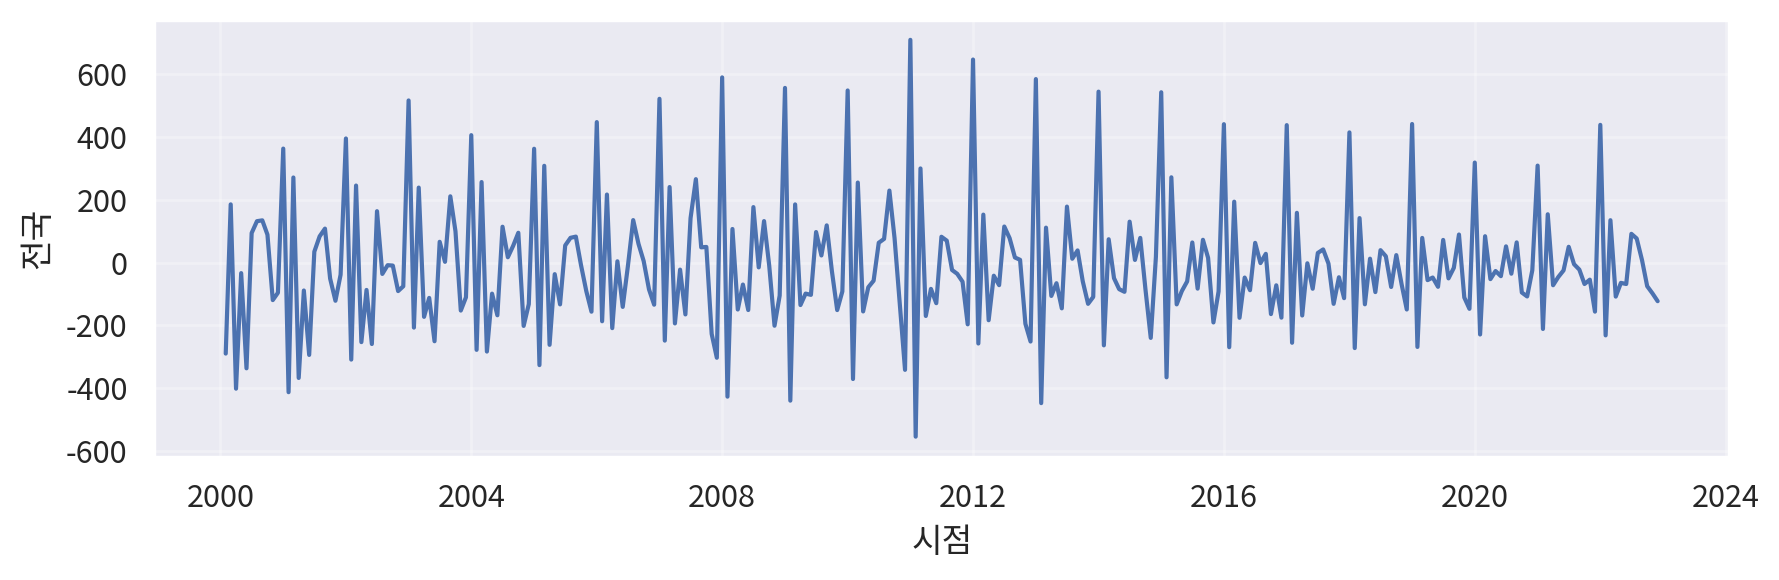

In [96]:
yname = '전국'
adf, diff_df = diff(df3, yname)
display(adf)
display(diff_df)

d = adf[adf['result']]['차수'].min()

display(d)

#차분 결과 시각화
width_px=  1800
height_px = 600
rows = 1
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)
sb.lineplot(data = diff_df, x= diff_df.index, y=yname)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

ACF, PACF

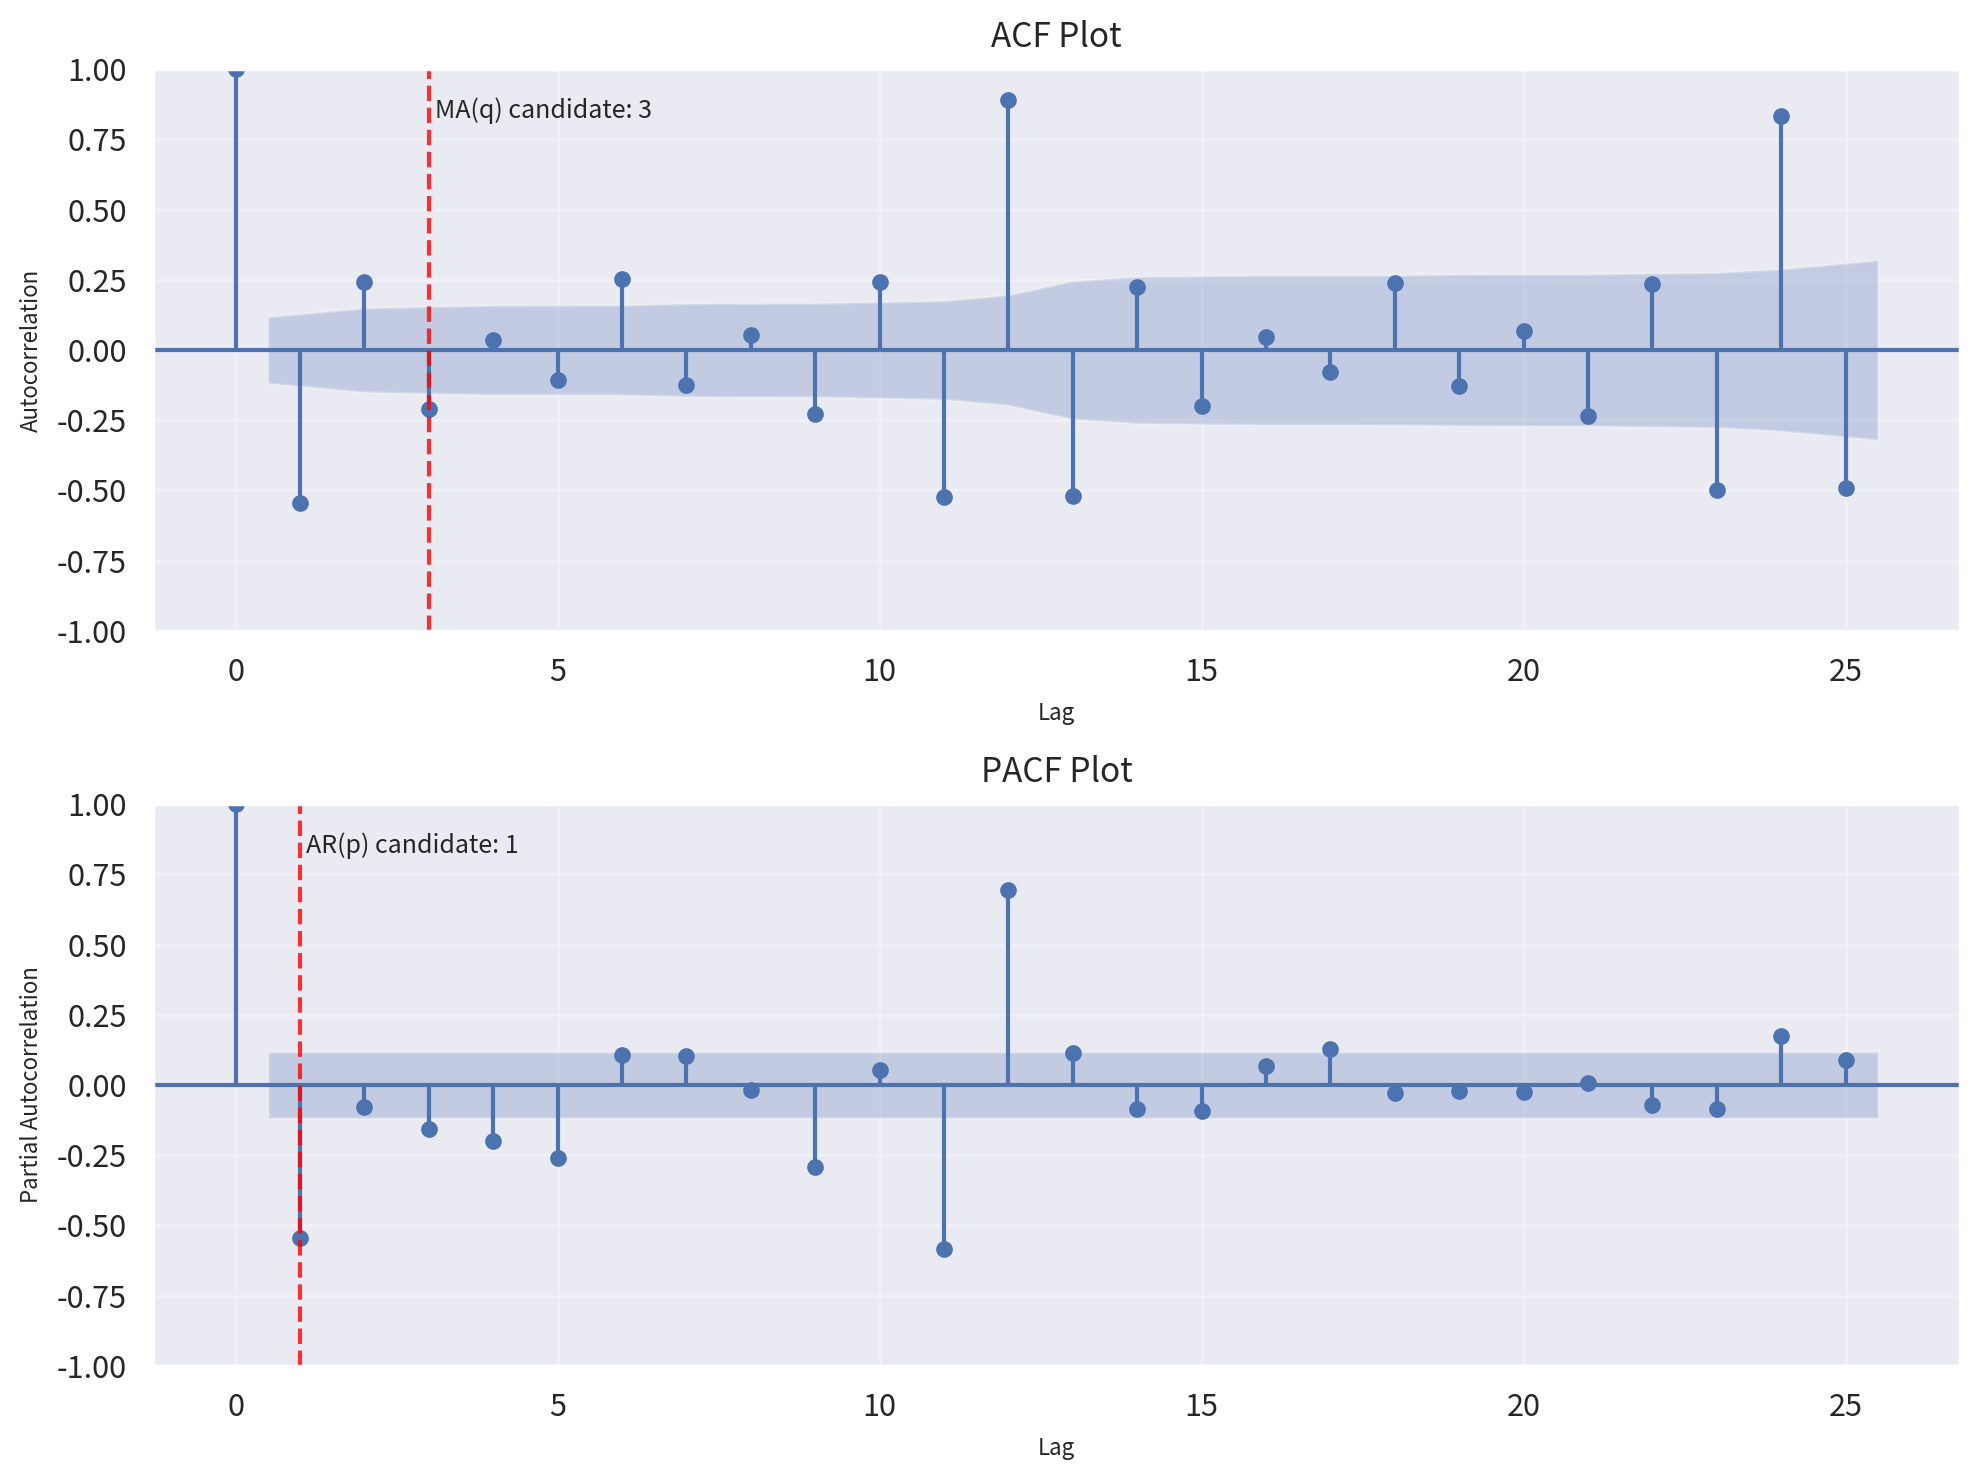

p=1, q=3
p=0, d=0, q=0, s=12
p=0, d=0, q=1, s=12
p=0, d=0, q=2, s=12


c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


p=0, d=0, q=3, s=12


c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


p=0, d=1, q=0, s=12
p=0, d=1, q=1, s=12
p=0, d=1, q=2, s=12
p=0, d=1, q=3, s=12
p=1, d=0, q=0, s=12
p=1, d=0, q=1, s=12


c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


p=1, d=0, q=2, s=12


c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


p=1, d=0, q=3, s=12


c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=1, d=1, q=0, s=12
p=1, d=1, q=1, s=12
p=1, d=1, q=2, s=12


c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=1, d=1, q=3, s=12


(    p  d  q          AIC          BIC
 0   0  0  0  4207.507814  4214.748616
 1   0  0  1  3796.569353  3811.050956
 2   0  0  2  3576.730186  3598.452592
 3   0  0  3  3516.947940  3545.911147
 4   0  1  0  3056.950591  3060.522745
 5   0  1  1  2987.311756  2998.028218
 6   0  1  2  2988.662416  3006.523187
 7   0  1  3  2989.837356  3014.842434
 8   1  0  0  3217.398089  3231.879693
 9   1  0  1  3203.187300  3224.909705
 10  1  0  2  3206.075997  3235.039204
 11  1  1  0  3017.689816  3028.406278
 12  1  1  1  2989.326778  3007.187548
 13  1  1  3  2989.415620  3021.565006,
 p         0.000000
 d         1.000000
 q         1.000000
 AIC    2987.311756
 BIC    2998.028218
 Name: 5, dtype: float64)

In [114]:
p,q =acf_pacf(diff_df, '전국')
print(f"p={p}, q={q}")
result_df, best_model = arima(df3, yname, p, d, q, 12)
result_df, best_model

최종 모형 생성 및 결과 해석

In [110]:
best_order = (
    int(best_model['p']),
    int(best_model['d']),
    int(best_model['q'])
)

s_best_order = (
    int(best_model['p']),
    int(best_model['d']),
    int(best_model['q']),
    12
)

final_model = ARIMA(df3[yname], order=best_order, seasonal_order=s_best_order)
final_fit = final_model.fit()

cdf,rdf, r, m, v = arima_report(final_fit, df)
display(cdf)
display(rdf)
display(r)
display(m)
display(v)

,Log Likelihood,AIC,BIC,HQIC,관측치 수
0,-1490.655878,2987.311756,2998.028218,2991.618446,276


,변수,계수,표준오차,z,p-value,CI_lower,CI_upper
0,ma.L1,-0.222022,0.055149,-4.026***,5.676004e-05,-0.330111,-0.113933
1,ma.S.L12,-0.607893,0.047284,-12.856***,7.942109e-38,-0.700569,-0.515218
2,sigma2,4807.275481,391.880447,12.267***,1.358726e-34,4039.203918,5575.347044


'Log Likelihood = -1490.656, AIC = 2987.312, BIC = 2998.028.'

'ARIMA(0, 1, 1)x(0, 1, 1, 12)모형을 적합한 결과, AIC 2987.312, BIC 2998.028로 나타났으며 잔차들 사이에 시간적 패턴이 남아있는 것으로 나타났으며, 모형이 충분히 설명하지 못했을 가능성이 있다.(잔차의 자기 상관이 Ljung-Box 검정에서 통계적으로 유의하다.)'

['ma.L1의 계수는 -0.222으로 통계적으로 의미가 있다 (p < 0.05). (직전 시점에서 발생한 예측 오차가 현재에 남긴 영향으로, 이 영향은 현재 값의 흐름을 값을 낮추는 방향 작용하며 우연이 아니라 반복되는 패턴일 가능성이 높다.)',
 'ma.S.L12의 계수는 -0.608으로 통계적으로 의미가 있다 (p < 0.05). (한 시즌 전 같은 시점에서 발생한 예측 오차가 현재에 남긴 영향으로, 이 영향은 현재 값의 흐름을 값을 낮추는 방향 작용하며 우연이 아니라 반복되는 패턴일 가능성이 높다.)',
 'sigma2의 계수는 4807.275으로 통계적으로 의미가 있다 (p < 0.05). (시계열의 특정 구조적 요소으로, 이 영향은 현재 값의 흐름을 값을 높이는 방향 작용하며 우연이 아니라 반복되는 패턴일 가능성이 높다.)']

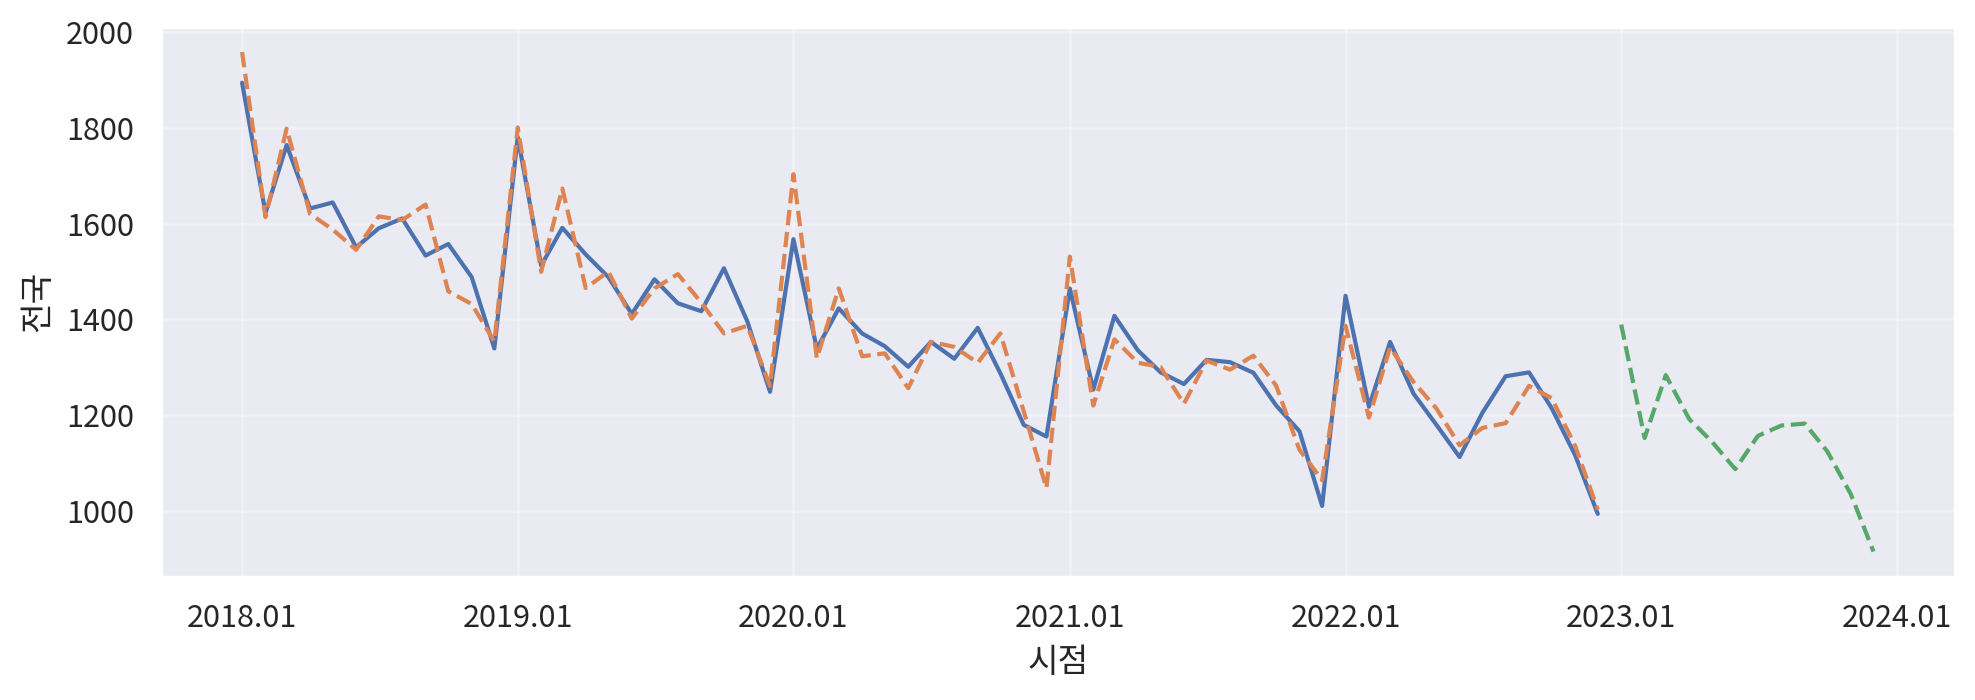

In [115]:
df4 = df3.copy()
df4['pred'] = final_fit.fittedvalues

# 최근 5년만 추림
df5 = df4.tail(12*5)

fc = final_fit.forecast(12)

width_px = 2000
height_px = 720
rows = 1
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

sb.lineplot(data=df5, x=df5.index, y="전국")
sb.lineplot(data=df5, x=df5.index, y='pred', linestyle='--')
sb.lineplot(x=fc.index, y=fc.values, linestyle='--')

ax.grid(True, alpha=0.3)

monthyearFmt = dates.DateFormatter("%Y.%m")
ax.xaxis.set_major_formatter(monthyearFmt)

plt.tight_layout()
plt.show()
plt.close()

인사이트
- 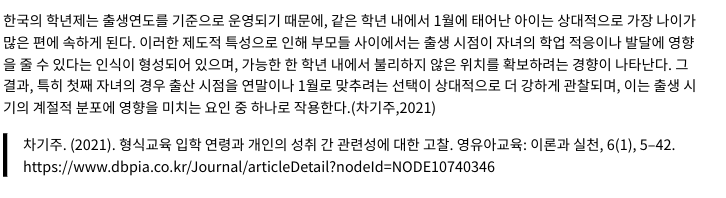